# Actividad Unidad 10 - Dataframes con Pandas

##Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 Punto : Cargar Dataset

Cargue el dataset disponible en https://www.datos.gov.co/Econom-a-y-Finanzas/Tasa-de-Cambio-Representativa-del-Mercado-TRM/32sa-8pi3

In [5]:
#instalar la API
!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


In [6]:
#Importar el paquete Socrata
from sodapy import Socrata

In [7]:
#Crear el cleinte con la url
client = Socrata("www.datos.gov.co", None)

In [ ]:
# hacer la peticion get al cliente con el codigo del dataset
results = client.get("32sa-8pi3")

In [ ]:
#Convertir en DataFrame
datos = pd.DataFrame.from_records(results)

# Convertir la columna 'valor' a tipo numérico
datos['valor'] = pd.to_numeric(datos['valor'],errors='coerce') #errors='coerce' para convertir los valores no numéricos en NaN
datos

,valor,unidad,vigenciadesde,vigenciahasta
0,4761.64,COP,2022-12-22T00:00:00.000,2022-12-22T00:00:00.000
1,4781.28,COP,2022-12-20T00:00:00.000,2022-12-20T00:00:00.000
2,4802.48,COP,2022-12-17T00:00:00.000,2022-12-19T00:00:00.000
3,4836.24,COP,2022-12-13T00:00:00.000,2022-12-13T00:00:00.000
4,4815.99,COP,2022-12-10T00:00:00.000,2022-12-12T00:00:00.000
...,...,...,...,...
995,1978.63,COP,2014-03-26T00:00:00.000,2014-03-26T00:00:00.000
996,1993.85,COP,2014-03-22T00:00:00.000,2014-03-25T00:00:00.000
997,1998.60,COP,2014-03-21T00:00:00.000,2014-03-21T00:00:00.000
998,2017.38,COP,2014-03-20T00:00:00.000,2014-03-20T00:00:00.000


##2 Punto: Medidas Estadísticas

Calcular:

###Media

In [ ]:
print(f"La media de la columna valor es: {datos.valor.mean()}")

La media de la columna 'valor' es: 3042.3765099999996


###Mediana

In [ ]:
print(f"La mediana de la columna valor es: {datos.valor.median()}")

La mediana de la columna valor es: 2972.525


###Desviación Estándar

In [ ]:
print(f"La desviacion estandar de la columna valor es: {datos.valor.std()}")

La desviacion estandar de la columna valor es: 730.6890057655628


###Varianza

In [ ]:
print(f"La varianza de la columna valor es: {datos.valor.var()}")

La varianza de la columna valor es: 533906.4231466666


###Máximo

In [ ]:
datos.max()

valor                            5061.21
unidad                               COP
vigenciadesde    2022-12-22T00:00:00.000
vigenciahasta    2022-12-22T00:00:00.000
dtype: object

###Mínimo

In [ ]:
datos.min()

valor                            1846.12
unidad                               COP
vigenciadesde    2014-03-19T00:00:00.000
vigenciahasta    2014-03-19T00:00:00.000
dtype: object

###Rango

In [ ]:
rango = datos.valor.max() - datos.valor.min()
print(f"El rango de la columna valor es: {rango}")

El rango de la columna valor es: 3215.09


## 3 Punto: Resumen Datos Numéricos

Presentar el resumen de los datos numéricos.

In [ ]:
#datos.valor.describe()
datos.describe()

,valor
count,1000.000000
mean,3042.376510
std,730.689006
min,1846.120000
25%,2500.497500
50%,2972.525000
75%,3646.340000
max,5061.210000


##4 Punto: Información General

Presentar la información general del dataset.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valor          1000 non-null   float64
 1   unidad         1000 non-null   object 
 2   vigenciadesde  1000 non-null   object 
 3   vigenciahasta  1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


## 5 Punto: Representación Gráfica

Hacer dos representaciones graficas que sean acordes a la naturaleza de los datos

###Caja y Bigotes

El diagrama de Caja y Bigotes de la columna Valor, muestra información estadística sobre la distribución de la Tasa de Cambio Representativa del Mercado (TRM).
* **Línea del centro**: Representa la Mediana cuyo valor es 2972.525.
*  **Caja**: La caja muestra el rango intercuartílico (IQR), que abarca el 50% central de los datos. El borde inferior de la caja corresponde al primer cuartil, y el borde superior corresponde al tercer cuartil.
* **Bigotes**: Los bigotes se extienden desde la caja y representan la variabilidad de los datos fuera del rango intercuartílico, asi como en las dos lineas de los bigotes tenemos los valores máximo 5061.210000 y mínimo 1846.120000.
* **Puntos** (marcas individuales): Algunas veces, los valores atípicos se muestran como puntos individuales más allá de los bigotes, pero no fue el caso para el Dataset analizado.

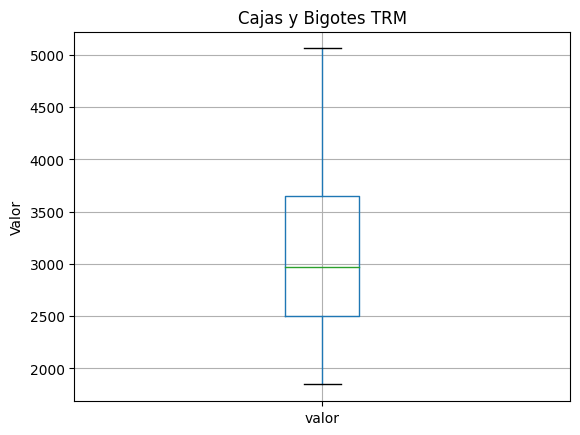

In [ ]:
trm_boxplot = datos[['valor']].boxplot()
trm_boxplot.set_title('Cajas y Bigotes TRM')
trm_boxplot.set_ylabel('Valor');

###Histograma

Al graficar un histograma del Dataset de la TRM, el eje horizontal representa los valores de la columna valor y el eje vertical muestra la frecuencia o la densidad de esos valores. Cada barra del histograma representa un rango de valores y su altura indica la frecuencia con la que los valores caen dentro de ese rango, por lo que se observa una gran densidad de valores cercanos a 3000.

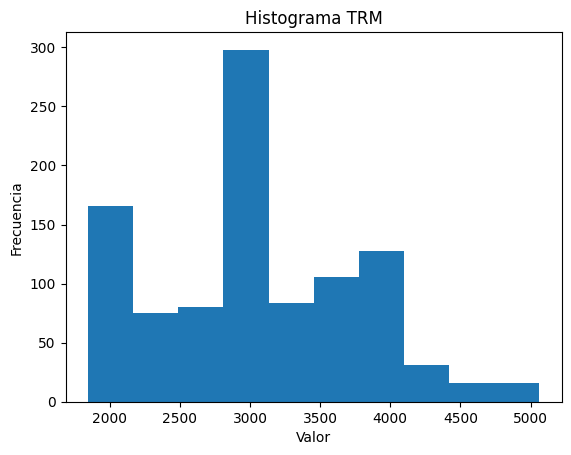

In [ ]:
trm_histograma = datos.valor.hist(grid=False)
trm_histograma.set_title('Histograma TRM')
trm_histograma.set_ylabel('Frecuencia')
trm_histograma.set_xlabel('Valor');

## 6 Punto: Cargar Dataset Datos Públicos Colombia

Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia.

Dataset sobre el reporte de hurto por la Policia Nacional: https://www.datos.gov.co/Seguridad-y-Defensa/Reporte-Hurto-por-Modalidades-Polic-a-Nacional/6sqw-8cg5

Solo se muestran mil datos; así que, se muestran los datos del año 2010.

In [9]:
# hacer la peticion get al cliente con el codigo del dataset
results2 = client.get("6sqw-8cg5")

#Convertir en DataFrame
datos_hurtos= pd.DataFrame.from_records(results2)
datos_hurtos

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad
0,CAQUETÁ,SAN VICENTE DEL CAGUÁN,18753000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,HURTO RESIDENCIAS,1
1,CAUCA,POPAYÁN (CT),19001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,HURTO RESIDENCIAS,2
2,HUILA,PITALITO,41551000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
3,VALLE,JAMUNDÍ,76364000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
4,AMAZONAS,LETICIA (CT),91001000,CONTUNDENTES,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
...,...,...,...,...,...,...,...,...,...
995,BOLÍVAR,CARTAGENA (CT),13001000,SIN EMPLEO DE ARMAS,15/01/2010,NO REPORTADO,NO REPORTADO,HURTO ENTIDADES COMERCIALES,1
996,CAUCA,TIMBÍO,19807000,SIN EMPLEO DE ARMAS,15/01/2010,NO REPORTADO,NO REPORTADO,HURTO ENTIDADES COMERCIALES,1
997,CESAR,VALLEDUPAR (CT),20001000,SIN EMPLEO DE ARMAS,15/01/2010,NO REPORTADO,NO REPORTADO,HURTO ENTIDADES COMERCIALES,1
998,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,SIN EMPLEO DE ARMAS,15/01/2010,NO REPORTADO,NO REPORTADO,HURTO ENTIDADES COMERCIALES,8


## 7 Punto: Limpieza y tranformación

Realice las tareas de limpieza y transformación necesarias

###Información del Dataframe

In [10]:
#Verificar información del dataset
datos_hurtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   departamento   1000 non-null   object
 1   municipio      1000 non-null   object
 2   codigo_dane    1000 non-null   object
 3   armas_medios   1000 non-null   object
 4   fecha_hecho    1000 non-null   object
 5   genero         1000 non-null   object
 6   grupo_etario   1000 non-null   object
 7   tipo_de_hurto  1000 non-null   object
 8   cantidad       1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


En los datos, no se encuentra ningun valor nulo, sin embargo en la columna **cantidad** hay que transformar los datos en valores numéricos.

###Conversión de datos

In [11]:
# Convertir la columna 'valor_precio' a tipo numérico
datos_hurtos['cantidad'] = pd.to_numeric(datos_hurtos['cantidad'])

Se pueden realizar Agrupaciones por departamento, municipio, armas medios, genero, grupo etario y tipo de hurto, para ver la cantidad y el valor promedio.

In [12]:
"""
Redondea dos décimales un valor float

  Parámetros:
    - valor (float): Valor a redondear.

    Retorna:
    - float: El valor redoneado a dos décimales.

    Ejemplo de uso:
    >>> redondear(5.25123)
    5.25
"""
def redondear(valor):
  return round(valor,2)

###Cantidad de Hurtos por Fecha

In [72]:
#Cantidad de los hurtos por fecha
cant_fecha = datos_hurtos.groupby(datos_hurtos["fecha_hecho"]).count()[["cantidad"]]
cant_fecha

,cantidad
fecha_hecho,
1/01/2010,50
10/01/2010,71
11/01/2010,69
12/01/2010,67
13/01/2010,62
14/01/2010,75
15/01/2010,61
2/01/2010,49
3/01/2010,67


###Cantidad de Hurtos por Departamento

In [13]:
#Cantidad de los hurtos por departamento
cant_dep = datos_hurtos.groupby(datos_hurtos["departamento"]).count()[["cantidad"]]
cant_dep

,cantidad
departamento,
AMAZONAS,6
ANTIOQUIA,52
ARAUCA,10
ATLÁNTICO,33
BOLÍVAR,37
BOYACÁ,44
CALDAS,28
CAQUETÁ,7
CASANARE,18


###Promedio de Hurtos por Departamento

In [14]:
#Promedio de los hurtos por día en cada departamento
datos_hurtos.groupby(datos_hurtos["departamento"]).mean()[["cantidad"]].applymap(redondear)

<ipython-input-14-222604944105>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_hurtos.groupby(datos_hurtos["departamento"]).mean()[["cantidad"]].applymap(redondear)


,cantidad
departamento,
AMAZONAS,1.00
ANTIOQUIA,1.13
ARAUCA,1.00
ATLÁNTICO,1.09
BOLÍVAR,1.03
BOYACÁ,1.07
CALDAS,1.00
CAQUETÁ,1.00
CASANARE,1.17


###Desviación Estandar de los Hurtos por Departamento

In [15]:
#Desviación estandar de la cantidad de hurtos por departamento
datos_hurtos.groupby(datos_hurtos["departamento"]).std()[["cantidad"]].applymap(redondear)

<ipython-input-15-5a93d9d30e25>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_hurtos.groupby(datos_hurtos["departamento"]).std()[["cantidad"]].applymap(redondear)


,cantidad
departamento,
AMAZONAS,0.00
ANTIOQUIA,0.40
ARAUCA,0.00
ATLÁNTICO,0.29
BOLÍVAR,0.16
BOYACÁ,0.25
CALDAS,0.00
CAQUETÁ,0.00
CASANARE,0.38


###Cantidad de Hurtos por Genero

In [32]:
#Cantidad de los hurtos por genero
cant_gen = datos_hurtos.groupby(datos_hurtos["genero"]).count()[["cantidad"]]
cant_gen

,cantidad
genero,
FEMENINO,264
MASCULINO,324
NO REPORTADO,412


###Cantidad de Hurtos por Grupo Etario

In [59]:
#Cantidad de los hurtos por grupo etario
cant_grupo = datos_hurtos.groupby(datos_hurtos["grupo_etario"]).count()[["cantidad"]]
cant_grupo

,cantidad
grupo_etario,
ADOLESCENTES,1
ADULTOS,587
NO REPORTADO,412


###Cantidad de Hurtos por Tipo de Hurto

In [58]:
#Cantidad de los hurtos por tipo de hurto
cant_tipo = datos_hurtos.groupby(datos_hurtos["tipo_de_hurto"]).count()[["cantidad"]]
cant_tipo

,cantidad
tipo_de_hurto,
HURTO ENTIDADES COMERCIALES,412
HURTO RESIDENCIAS,588


###Cantidad de Hurtos por Medio Usado

In [35]:
#Cantidad de los hurtos por medio
cant_medio = datos_hurtos.groupby(datos_hurtos["armas_medios"]).count()[["cantidad"]]
cant_medio

,cantidad
armas_medios,
ARMA BLANCA / CORTOPUNZANTE,21
ARMA DE FUEGO,142
CONTUNDENTES,316
CORTANTES,42
NO REPORTA,42
NO REPORTADO,31
PUNZANTES,2
SIN EMPLEO DE ARMAS,404


## Puntos 8,9 y 10: Presentación del Dataset y Gráficas

8. Presentar el dataset, mostrando datos estadísticos y gráficas.
9. Se debe incluir mínimo una tabla pivote y una agrupación.
10. Todas las gráficas deben ser explicadas.

### Hurtos por Fecha

####Estadísticos Hurtos por Fecha

In [103]:
#Estadisticos Hurtos por Fecha
media_fecha = cant_fecha.cantidad.mean()
mediana_fecha = cant_fecha.cantidad.median()
desv_fecha = cant_fecha.cantidad.std()
min_fecha = cant_fecha.cantidad.min()
max_fecha = cant_fecha.cantidad.max()
rango_fecha = max_fecha - min_fecha
pCuartil_fecha = cant_fecha.cantidad.quantile(0.25)
tCuartil_fecha = cant_fecha.cantidad.quantile(0.75)
print("Resumen Estadístico".center(50,'-'))
print(f"Media: {media_fecha:.2f}")
print(f"Mediana: {mediana_fecha:.2f}")
print(f"Desviación estándar: {desv_fecha:.2f}")
print(f"Valor mínimo: {min_fecha:.2f}")
print(f"Valor máximo: {max_fecha:.2f}")
print(f"Rango: {rango_fecha:.2f}")
print(f"Primer cuartil: {pCuartil_fecha:.2f}")
print(f"Tercer cuartil: {tCuartil_fecha:.2f}")

---------------Resumen Estadístico----------------
Media: 66.67
Mediana: 69.00
Desviación estándar: 8.57
Valor mínimo: 49.00
Valor máximo: 80.00
Rango: 31.00
Primer cuartil: 63.00
Tercer cuartil: 72.00


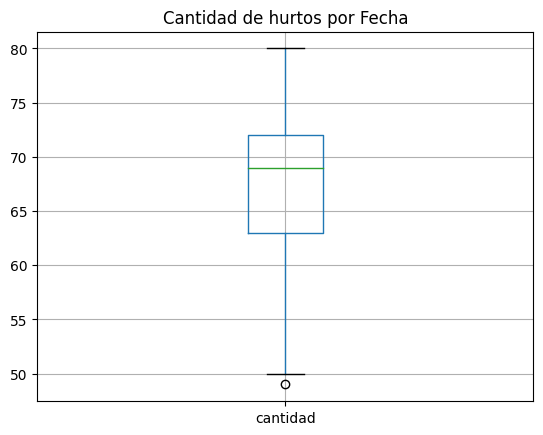

In [105]:
box_fecha = cant_fecha.boxplot()
box_fecha.set_title("Cantidad de hurtos por Fecha");

#### Gráfico de líneas Hurtos por Fecha

En el gráfico de líneas se observa la cantidad de Hurtos por fecha, se observa en que fecha se cometieron la mayor cantidad de hurtos y en cuál fecha la menor cantidad, y como en la última fecha subieron los hurtos.

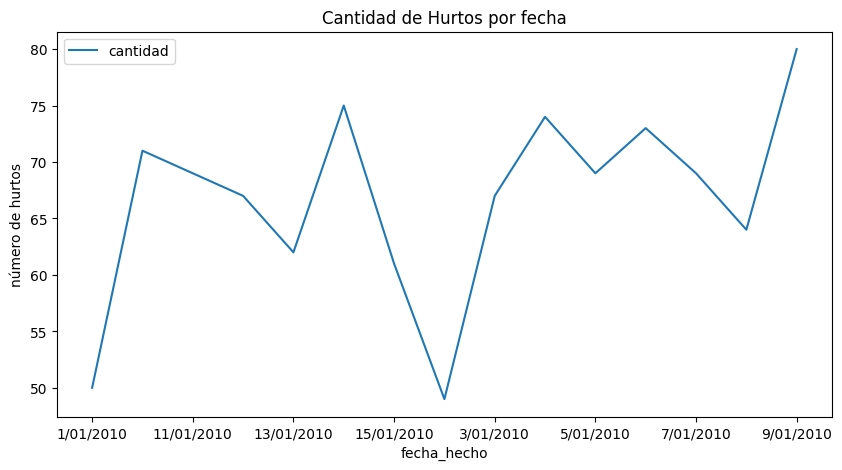

In [83]:
#Gráfico de líneas cantidad de hurtos por fecha
lin_fecha = cant_fecha.plot(figsize=(10, 5));
lin_fecha.set_title('Cantidad de Hurtos por fecha')
lin_fecha.set_ylabel('número de hurtos');

### Hurtos por Departamento

#### Estadísticos Hurtos por Departamento

In [108]:
print("Resumen Estadístico Hurtos x Dpto".center(50,'-'))
cant_dep.describe()

--------Resumen Estadístico Hurtos x Dpto---------


,cantidad
count,32.00000
mean,31.25000
std,34.05972
min,1.00000
25%,9.75000
50%,21.50000
75%,37.50000
max,155.00000


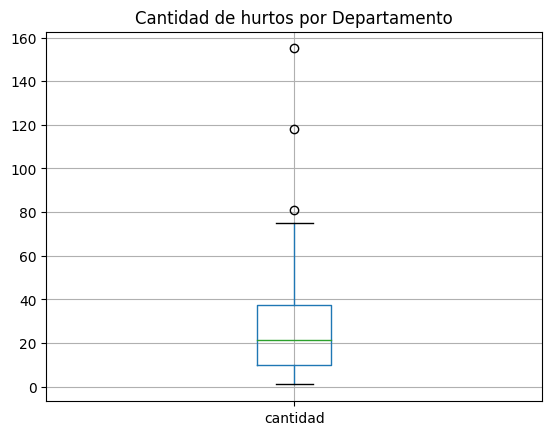

In [107]:
box_dep = cant_dep.boxplot()
box_dep.set_title("Cantidad de hurtos por Departamento");

#### Gráfico de Barras Hurtos por Departamento

En el gráfico de barras se observa la cantidad de Hurtos por departamento, se puede comparar la cantidad de hurtos de un departamento a otro, en cuáles departamentos hubieron más hurtos y en cuáles menos.

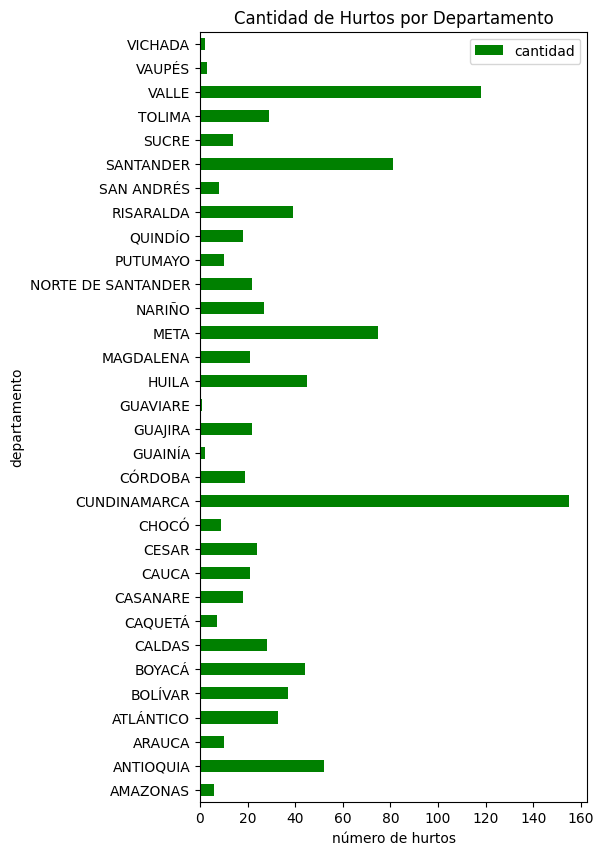

In [89]:
#Cantidad de hurtos por departamento
bar_dep = cant_dep.plot(kind='barh', color='green',figsize=(5, 10))
bar_dep.set_title('Cantidad de Hurtos por Departamento')
bar_dep.set_xlabel('número de hurtos');

### Gráficos Hurtos por Género

En el gráfico de barras se observa la cantidad de Hurtos por género, cuáles géneros cometen más hurtos, además un gráfico de pastel para ver los porcentajes de hurtos de cada género.

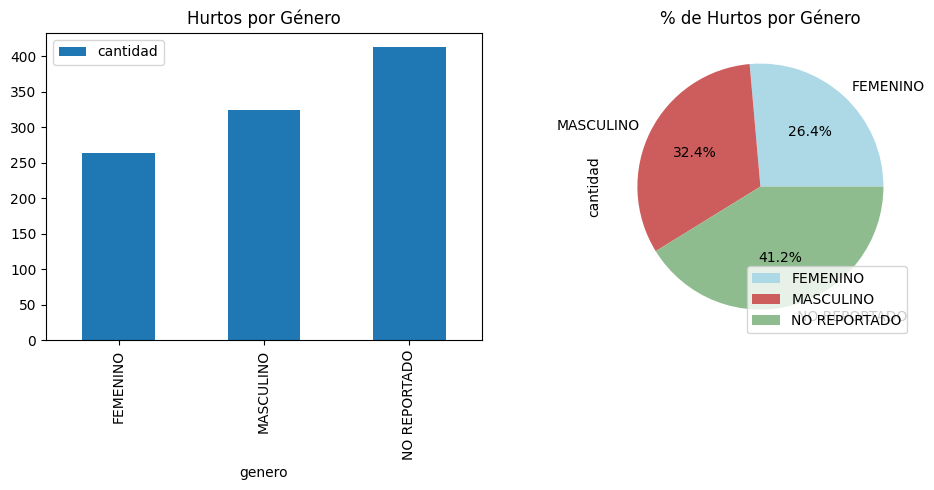

In [54]:
# Crear los subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Graficar el gráfico de barras en el primer subplot
bar_gen = cant_gen.plot(kind='bar', ax=axs[0])
bar_gen.set_title('Hurtos por Género')

# Graficar el gráfico de pastel en el segundo subplot
colores = ['#ADD8E6', '#CD5C5C', '#8FBC8F']
pie_gen = cant_gen.plot(kind='pie', y='cantidad', autopct='%1.1f%%', colors=colores,ax=axs[1])
pie_gen.set_title('% de Hurtos por Género')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Gráficos Hurtos por Grupo Etario y Tipo

En los gráfico de barras se observa la cantidad de Hurtos por grupo etario y el tipo de Hurto realizado, cuáles grupos etarios cometen más hurtos y qué tipos de hurtos se cometen más, además un gráfico de pastel para ver los porcentajes de hurtos de cada grupo etario y del tipo de hurto realizado.

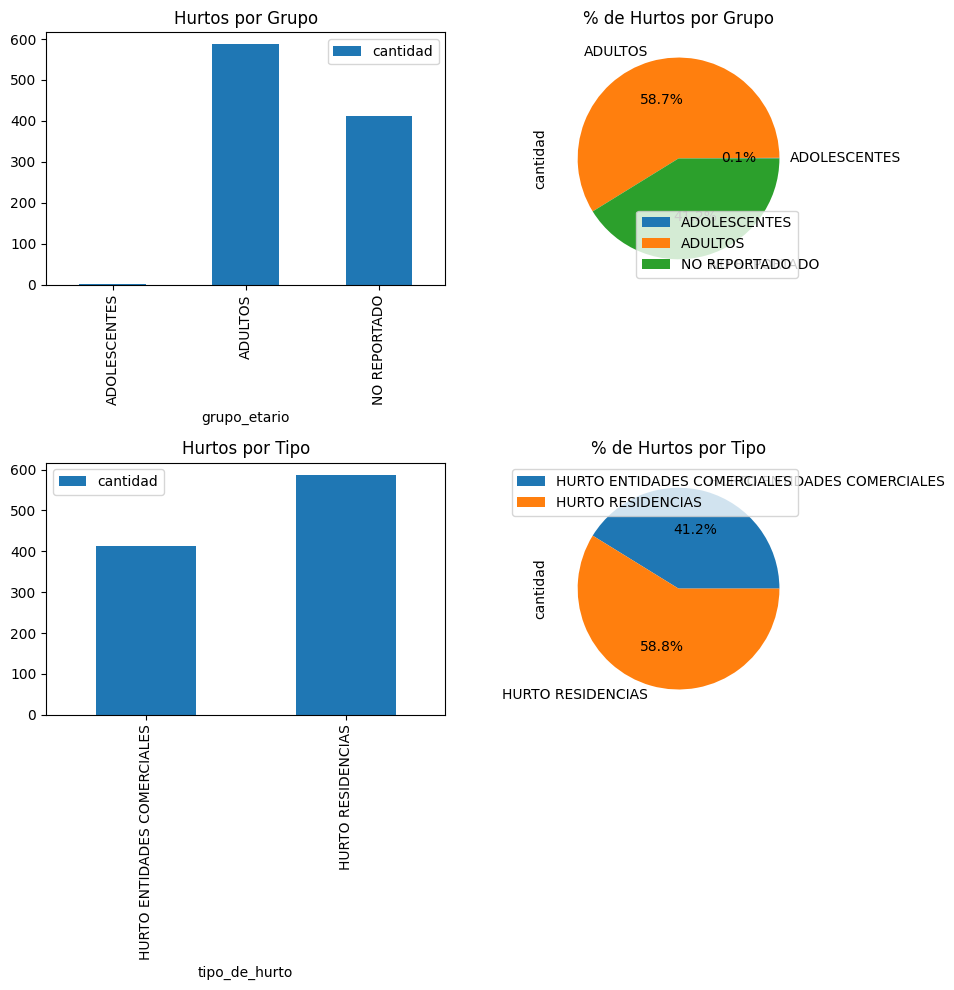

In [67]:
# Crear los subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Graficar el gráfico de barras en el primer subplot
bar_grupo = cant_grupo.plot(kind='bar', ax=axs[0,0])
bar_grupo.set_title('Hurtos por Grupo')

# Graficar el gráfico de pastel en el segundo subplot
pie_grupo = cant_grupo.plot(kind='pie', y='cantidad', autopct='%1.1f%%', ax=axs[0,1])
pie_grupo.set_title('% de Hurtos por Grupo')

# Graficar el gráfico de barras en el tercer subplot
bar_tipo = cant_tipo.plot(kind='bar', ax=axs[1,0])
bar_tipo.set_title('Hurtos por Tipo')

# Graficar el gráfico de pastel en el cuarto subplot
pie_tipo = cant_tipo.plot(kind='pie', y='cantidad', autopct='%1.1f%%', ax=axs[1,1])
pie_tipo.set_title('% de Hurtos por Tipo')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Gráficos Hurtos por Medio Usado

En el gráfico de barras se observa la cantidad de Hurtos que se cometieron con un respectivo medio, se puede comparar la cantidad de hurtos cometidos por cada medio, y con cuál medio se cometen más hurtos y con cúal menos.

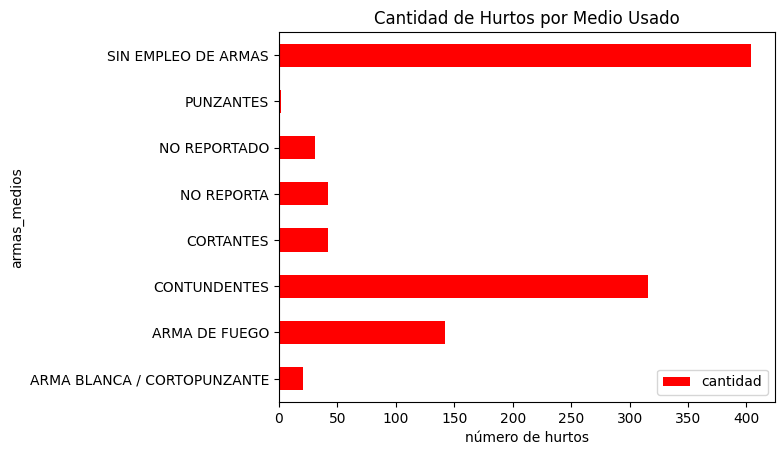

In [69]:
#Cantidad de hurtos por Medio usado
bar_medio = cant_medio.plot(kind='barh', color='red')
bar_medio.set_title('Cantidad de Hurtos por Medio Usado')
bar_medio.set_xlabel('número de hurtos');

### Tipo de Medio utilizado en el Hurto por Departamento

#### Tabla Pivote Cantidad

In [114]:
#Tabla pivote del candidad de hurtos con distintos medios usados en hurto por departamento
medio_dpto = datos_hurtos.pivot_table(values='cantidad', index=['departamento'], columns=['armas_medios'], aggfunc='count',fill_value=0)
medio_dpto

armas_medios,ARMA BLANCA / CORTOPUNZANTE,ARMA DE FUEGO,CONTUNDENTES,CORTANTES,NO REPORTA,NO REPORTADO,PUNZANTES,SIN EMPLEO DE ARMAS
departamento,,,,,,,,
AMAZONAS,0,0,1,0,0,0,0,5
ANTIOQUIA,0,3,10,2,5,2,0,30
ARAUCA,0,0,2,0,1,0,0,7
ATLÁNTICO,0,12,11,0,2,3,0,5
BOLÍVAR,0,4,3,1,6,4,0,19
BOYACÁ,1,4,23,2,0,0,0,14
CALDAS,0,6,9,0,0,2,0,11
CAQUETÁ,3,0,0,0,0,0,0,4
CASANARE,0,0,11,0,3,2,0,2


##### Gráfico de Líneas

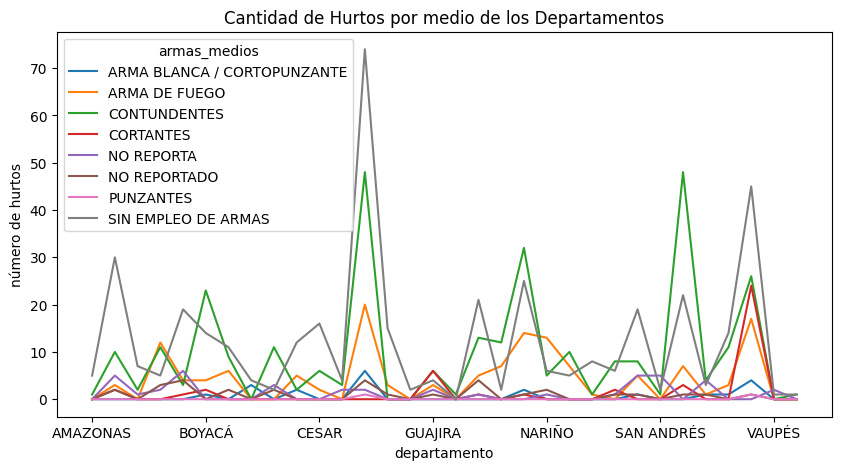

In [93]:
#Gráfico de líneas cantidad de hurtos por fecha
lin_medio_dpto = medio_dpto.plot(figsize=(10, 5));
lin_medio_dpto.set_title('Cantidad de Hurtos por medio de los Departamentos')
lin_medio_dpto.set_ylabel('número de hurtos');

#### Tabla Pivote Media

In [116]:
#Tabla pivote del valor promedio de los distintos medios usados en hurto por departamento
datos_hurtos.pivot_table(values='cantidad', index=['departamento'], columns=['armas_medios'], aggfunc='mean',fill_value=0)

armas_medios,ARMA BLANCA / CORTOPUNZANTE,ARMA DE FUEGO,CONTUNDENTES,CORTANTES,NO REPORTA,NO REPORTADO,PUNZANTES,SIN EMPLEO DE ARMAS
departamento,,,,,,,,
AMAZONAS,0.0,0.000000,1.000000,0.000000,0,0.0,0,1.000000
ANTIOQUIA,0.0,1.000000,1.100000,1.000000,1,1.0,0,1.200000
ARAUCA,0.0,0.000000,1.000000,0.000000,1,0.0,0,1.000000
ATLÁNTICO,0.0,1.166667,1.090909,0.000000,1,1.0,0,1.000000
BOLÍVAR,0.0,1.000000,1.000000,1.000000,1,1.0,0,1.052632
BOYACÁ,1.0,1.000000,1.086957,1.000000,0,0.0,0,1.071429
CALDAS,0.0,1.000000,1.000000,0.000000,0,1.0,0,1.000000
CAQUETÁ,1.0,0.000000,0.000000,0.000000,0,0.0,0,1.000000
CASANARE,0.0,0.000000,1.181818,0.000000,1,1.5,0,1.000000


### Fecha del Hurto por Departamento

####Tabla Pivote Cantidad

In [118]:
#Tabla pivote de la fecha de hurtos por departamento
datos_hurtos.pivot_table(values='cantidad', index=['departamento'], columns=['fecha_hecho'], aggfunc='count',fill_value=0)

fecha_hecho,1/01/2010,10/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,2/01/2010,3/01/2010,4/01/2010,5/01/2010,6/01/2010,7/01/2010,8/01/2010,9/01/2010
departamento,,,,,,,,,,,,,,,
AMAZONAS,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1
ANTIOQUIA,2,3,3,0,3,2,4,3,2,5,6,3,4,7,5
ARAUCA,1,0,1,0,0,1,0,0,0,1,2,1,1,1,1
ATLÁNTICO,0,5,2,2,1,3,2,2,2,5,2,3,0,1,3
BOLÍVAR,2,4,1,2,2,3,1,2,3,3,0,6,5,1,2
BOYACÁ,1,4,6,4,2,5,0,2,3,5,2,1,2,5,2
CALDAS,0,1,0,1,0,3,5,1,1,1,0,6,5,2,2
CAQUETÁ,2,2,0,0,0,0,0,0,0,1,0,0,0,0,2
CASANARE,2,0,2,0,1,0,1,0,1,1,2,2,4,0,2


###Tipo de Hurtos por Genero

####Tabla Pivote Cantidad

In [129]:
#Tabla Pivote tipo de hurtos por genero
tipo_gen = datos_hurtos.pivot_table(values='cantidad', index=['tipo_de_hurto'], columns=['genero'], aggfunc='count',fill_value=0)
tipo_gen

genero,FEMENINO,MASCULINO,NO REPORTADO
tipo_de_hurto,,,
HURTO ENTIDADES COMERCIALES,0,0,412
HURTO RESIDENCIAS,264,324,0


Se observa que todos los hurtos a entidades comerciales no se reportan el genero de la persona que lo cometió.

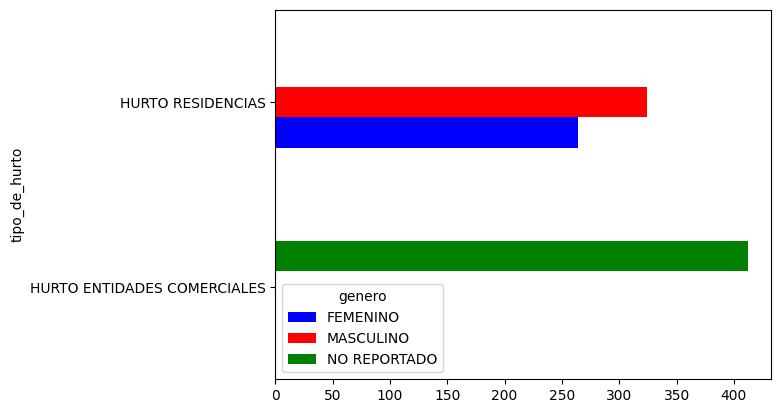

In [136]:
tipo_gen.plot(kind='barh',color=['blue', 'red', 'green']);